# Sales Insight Case Study


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob as glob

In [88]:
path = '/Users/ademola/Desktop/Sales_Data'
filenames = glob.glob(path + "/*.csv")
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

* Combine the data from the 12 months into a single spreadsheet

In [89]:
data = pd.concat(dfs, ignore_index=True)

**Remove data with NaN**

In [90]:
# What was the best month for sales? How much was earned that month?
features = ['Order Date', 'Product', 'Quantity Ordered', 'Price Each', 'Purchase Address']
features

['Order Date', 'Product', 'Quantity Ordered', 'Price Each', 'Purchase Address']

In [91]:
cleanedData = data[features]
cleanedData

,Order Date,Product,Quantity Ordered,Price Each,Purchase Address
0,12/30/19 00:01,Macbook Pro Laptop,1,1700,"136 Church St, New York City, NY 10001"
1,12/29/19 07:03,LG Washing Machine,1,600.0,"562 2nd St, New York City, NY 10001"
2,12/12/19 18:21,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001"
3,12/22/19 15:13,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016"
4,12/18/19 12:38,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...
186845,06/07/19 19:02,AAA Batteries (4-pack),1,2.99,"795 Pine St, Boston, MA 02215"
186846,06/01/19 19:29,27in FHD Monitor,1,149.99,"495 North St, New York City, NY 10001"
186847,06/22/19 18:57,USB-C Charging Cable,1,11.95,"319 Ridge St, San Francisco, CA 94016"
186848,06/26/19 18:35,USB-C Charging Cable,1,11.95,"916 Main St, San Francisco, CA 94016"


In [92]:
cleanedData = cleanedData.dropna(how='all')
cleanedData

,Order Date,Product,Quantity Ordered,Price Each,Purchase Address
0,12/30/19 00:01,Macbook Pro Laptop,1,1700,"136 Church St, New York City, NY 10001"
1,12/29/19 07:03,LG Washing Machine,1,600.0,"562 2nd St, New York City, NY 10001"
2,12/12/19 18:21,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001"
3,12/22/19 15:13,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016"
4,12/18/19 12:38,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...
186845,06/07/19 19:02,AAA Batteries (4-pack),1,2.99,"795 Pine St, Boston, MA 02215"
186846,06/01/19 19:29,27in FHD Monitor,1,149.99,"495 North St, New York City, NY 10001"
186847,06/22/19 18:57,USB-C Charging Cable,1,11.95,"319 Ridge St, San Francisco, CA 94016"
186848,06/26/19 18:35,USB-C Charging Cable,1,11.95,"916 Main St, San Francisco, CA 94016"


In [93]:
# get month from order date
cleanedData['Month'] = cleanedData['Order Date'].str[0:2]
cleanedData['Month'] = pd.to_numeric(cleanedData['Month'], errors='coerce')
cleanedData['Month'] = cleanedData['Month'].fillna(0).astype(int)
cleanedData

/var/folders/z1/g3kc4r891r5dk40w3hq3k4wr0000gn/T/ipykernel_88329/477701012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedData['Month'] = cleanedData['Order Date'].str[0:2]
/var/folders/z1/g3kc4r891r5dk40w3hq3k4wr0000gn/T/ipykernel_88329/477701012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedData['Month'] = pd.to_numeric(cleanedData['Month'], errors='coerce')
/var/folders/z1/g3kc4r891r5dk40w3hq3k4wr0000gn/T/ipykernel_88329/477701012.py:4: SettingWithCopyWarning: 
A value is trying 

,Order Date,Product,Quantity Ordered,Price Each,Purchase Address,Month
0,12/30/19 00:01,Macbook Pro Laptop,1,1700,"136 Church St, New York City, NY 10001",12
1,12/29/19 07:03,LG Washing Machine,1,600.0,"562 2nd St, New York City, NY 10001",12
2,12/12/19 18:21,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001",12
3,12/22/19 15:13,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016",12
4,12/18/19 12:38,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...
186845,06/07/19 19:02,AAA Batteries (4-pack),1,2.99,"795 Pine St, Boston, MA 02215",6
186846,06/01/19 19:29,27in FHD Monitor,1,149.99,"495 North St, New York City, NY 10001",6
186847,06/22/19 18:57,USB-C Charging Cable,1,11.95,"319 Ridge St, San Francisco, CA 94016",6
186848,06/26/19 18:35,USB-C Charging Cable,1,11.95,"916 Main St, San Francisco, CA 94016",6


In [94]:
# convert month in january to december to int
def convertMonth(month):
    if month == 1:
        return 'January'
    elif month == 2:
        return 'February'
    elif month == 3:
        return 'March'
    elif month == 4:
        return 'April'
    elif month == 5:
        return 'May'
    elif month == 6:
        return 'June'
    elif month == 7:
        return 'July'
    elif month == 8:
        return 'August'
    elif month == 9:
        return 'September'
    elif month == 10:
        return 'October'
    elif month == 11:
        return 'November'
    elif month == 12:
        return 'December'
    else:
        return 'Invalid Month'

In [95]:
cleanedData['Month'] = cleanedData['Month'].apply(convertMonth)
cleanedData

/var/folders/z1/g3kc4r891r5dk40w3hq3k4wr0000gn/T/ipykernel_88329/803310980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedData['Month'] = cleanedData['Month'].apply(convertMonth)


,Order Date,Product,Quantity Ordered,Price Each,Purchase Address,Month
0,12/30/19 00:01,Macbook Pro Laptop,1,1700,"136 Church St, New York City, NY 10001",December
1,12/29/19 07:03,LG Washing Machine,1,600.0,"562 2nd St, New York City, NY 10001",December
2,12/12/19 18:21,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001",December
3,12/22/19 15:13,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016",December
4,12/18/19 12:38,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",December
...,...,...,...,...,...,...
186845,06/07/19 19:02,AAA Batteries (4-pack),1,2.99,"795 Pine St, Boston, MA 02215",June
186846,06/01/19 19:29,27in FHD Monitor,1,149.99,"495 North St, New York City, NY 10001",June
186847,06/22/19 18:57,USB-C Charging Cable,1,11.95,"319 Ridge St, San Francisco, CA 94016",June
186848,06/26/19 18:35,USB-C Charging Cable,1,11.95,"916 Main St, San Francisco, CA 94016",June


In [96]:
# convert quantity ordered and price each to int
cleanedData['Quantity Ordered'] = pd.to_numeric(cleanedData['Quantity Ordered'], errors='coerce').fillna(0).astype(int)
cleanedData['Price Each'] = pd.to_numeric(cleanedData['Price Each'], errors='coerce').fillna(0).astype(int)
cleanedData

/var/folders/z1/g3kc4r891r5dk40w3hq3k4wr0000gn/T/ipykernel_88329/1941502856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedData['Quantity Ordered'] = pd.to_numeric(cleanedData['Quantity Ordered'], errors='coerce').fillna(0).astype(int)
/var/folders/z1/g3kc4r891r5dk40w3hq3k4wr0000gn/T/ipykernel_88329/1941502856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedData['Price Each'] = pd.to_numeric(cleanedData['Price Each'], errors='coerce').fillna(0).astype(int)


,Order Date,Product,Quantity Ordered,Price Each,Purchase Address,Month
0,12/30/19 00:01,Macbook Pro Laptop,1,1700,"136 Church St, New York City, NY 10001",December
1,12/29/19 07:03,LG Washing Machine,1,600,"562 2nd St, New York City, NY 10001",December
2,12/12/19 18:21,USB-C Charging Cable,1,11,"277 Main St, New York City, NY 10001",December
3,12/22/19 15:13,27in FHD Monitor,1,149,"410 6th St, San Francisco, CA 94016",December
4,12/18/19 12:38,USB-C Charging Cable,1,11,"43 Hill St, Atlanta, GA 30301",December
...,...,...,...,...,...,...
186845,06/07/19 19:02,AAA Batteries (4-pack),1,2,"795 Pine St, Boston, MA 02215",June
186846,06/01/19 19:29,27in FHD Monitor,1,149,"495 North St, New York City, NY 10001",June
186847,06/22/19 18:57,USB-C Charging Cable,1,11,"319 Ridge St, San Francisco, CA 94016",June
186848,06/26/19 18:35,USB-C Charging Cable,1,11,"916 Main St, San Francisco, CA 94016",June


In [97]:
 
# add sales column
cleanedData['Sales'] = cleanedData['Quantity Ordered'] * cleanedData['Price Each']
cleanedData

/var/folders/z1/g3kc4r891r5dk40w3hq3k4wr0000gn/T/ipykernel_88329/1050593875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedData['Sales'] = cleanedData['Quantity Ordered'] * cleanedData['Price Each']


,Order Date,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales
0,12/30/19 00:01,Macbook Pro Laptop,1,1700,"136 Church St, New York City, NY 10001",December,1700
1,12/29/19 07:03,LG Washing Machine,1,600,"562 2nd St, New York City, NY 10001",December,600
2,12/12/19 18:21,USB-C Charging Cable,1,11,"277 Main St, New York City, NY 10001",December,11
3,12/22/19 15:13,27in FHD Monitor,1,149,"410 6th St, San Francisco, CA 94016",December,149
4,12/18/19 12:38,USB-C Charging Cable,1,11,"43 Hill St, Atlanta, GA 30301",December,11
...,...,...,...,...,...,...,...
186845,06/07/19 19:02,AAA Batteries (4-pack),1,2,"795 Pine St, Boston, MA 02215",June,2
186846,06/01/19 19:29,27in FHD Monitor,1,149,"495 North St, New York City, NY 10001",June,149
186847,06/22/19 18:57,USB-C Charging Cable,1,11,"319 Ridge St, San Francisco, CA 94016",June,11
186848,06/26/19 18:35,USB-C Charging Cable,1,11,"916 Main St, San Francisco, CA 94016",June,11


In [98]:
# Month with highest sales
cleanedData.groupby('Month').sum()
cleanedData.groupby('Month').sum()
monthWithHighestSales = cleanedData.groupby('Month').sum().sort_values('Sales', ascending=False)
monthWithHighestSales

/var/folders/z1/g3kc4r891r5dk40w3hq3k4wr0000gn/T/ipykernel_88329/2444942062.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cleanedData.groupby('Month').sum()
/var/folders/z1/g3kc4r891r5dk40w3hq3k4wr0000gn/T/ipykernel_88329/2444942062.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cleanedData.groupby('Month').sum()
/var/folders/z1/g3kc4r891r5dk40w3hq3k4wr0000gn/T/ipykernel_88329/2444942062.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should

,Quantity Ordered,Price Each,Sales
Month,,,
December,28114,4569702,4591824
October,22703,3700299,3719205
April,20558,3354065,3374951
November,19798,3167467,3184394
May,18667,3122775,3138287
March,17005,2779903,2794068
July,16072,2621867,2635443
June,15253,2551984,2566187
August,13448,2221451,2234194


In [105]:
# what was the best month for sales? How much was earned that month?
monthWithHighestSales = monthWithHighestSales.reset_index()
monthWithHighestSales

,index,Month,Quantity Ordered,Price Each,Sales
0,0,December,28114,4569702,4591824
1,1,October,22703,3700299,3719205
2,2,April,20558,3354065,3374951
3,3,November,19798,3167467,3184394
4,4,May,18667,3122775,3138287
5,5,March,17005,2779903,2794068
6,6,July,16072,2621867,2635443
7,7,June,15253,2551984,2566187
8,8,August,13448,2221451,2234194
9,9,February,13449,2179934,2191696


<Axes: xlabel='Month'>

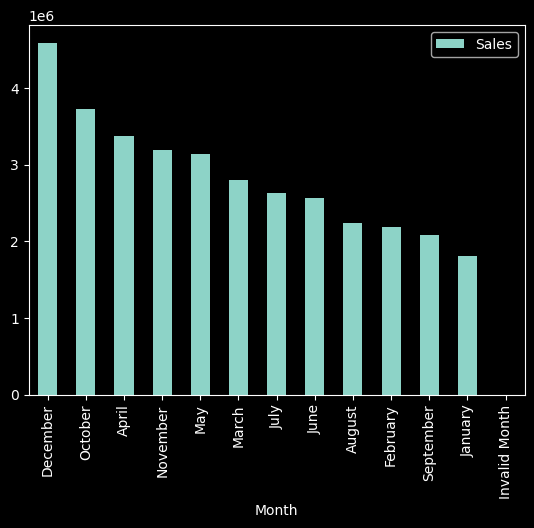

In [100]:
monthWithHighestSales.plot(x='Month', y='Sales', kind='bar')

# What city sold the most products?

In [115]:
# What city had the highest number of sales?
# add city column
def getCity(address):
    return address.split(',')[1]


In [121]:
# add city column
cleanedData['City'] = cleanedData['Purchase Address'].str.split(',').str[1]
cleanedData

/var/folders/z1/g3kc4r891r5dk40w3hq3k4wr0000gn/T/ipykernel_88329/23697826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedData['City'] = cleanedData['Purchase Address'].str.split(',').str[1]


,Order Date,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,City
0,12/30/19 00:01,Macbook Pro Laptop,1,1700,"136 Church St, New York City, NY 10001",December,1700,New York City
1,12/29/19 07:03,LG Washing Machine,1,600,"562 2nd St, New York City, NY 10001",December,600,New York City
2,12/12/19 18:21,USB-C Charging Cable,1,11,"277 Main St, New York City, NY 10001",December,11,New York City
3,12/22/19 15:13,27in FHD Monitor,1,149,"410 6th St, San Francisco, CA 94016",December,149,San Francisco
4,12/18/19 12:38,USB-C Charging Cable,1,11,"43 Hill St, Atlanta, GA 30301",December,11,Atlanta
...,...,...,...,...,...,...,...,...
186845,06/07/19 19:02,AAA Batteries (4-pack),1,2,"795 Pine St, Boston, MA 02215",June,2,Boston
186846,06/01/19 19:29,27in FHD Monitor,1,149,"495 North St, New York City, NY 10001",June,149,New York City
186847,06/22/19 18:57,USB-C Charging Cable,1,11,"319 Ridge St, San Francisco, CA 94016",June,11,San Francisco
186848,06/26/19 18:35,USB-C Charging Cable,1,11,"916 Main St, San Francisco, CA 94016",June,11,San Francisco


In [123]:
# get city with highest sales
cityWithHighestSales = cleanedData.groupby('City').sum().sort_values('Sales', ascending=False)
cityWithHighestSales

/var/folders/z1/g3kc4r891r5dk40w3hq3k4wr0000gn/T/ipykernel_88329/1400109942.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cityWithHighestSales = cleanedData.groupby('City').sum().sort_values('Sales', ascending=False)


,Quantity Ordered,Price Each,Sales
City,,,
San Francisco,50239,8178055,8223669
Los Angeles,33289,5399261,5426973
New York City,27932,4616764,4642872
Boston,22528,3622510,3644327
Atlanta,16602,2768857,2782841
Dallas,16730,2741555,2755117
Seattle,16553,2722310,2735070
Portland,14053,2298450,2309717
Austin,11153,1802516,1811054


In [159]:
cityWithHighestSales.iloc[0]

Quantity Ordered      50239
Price Each          8178055
Sales               8223669
Name:  San Francisco, dtype: int64

<BarContainer object of 9 artists>

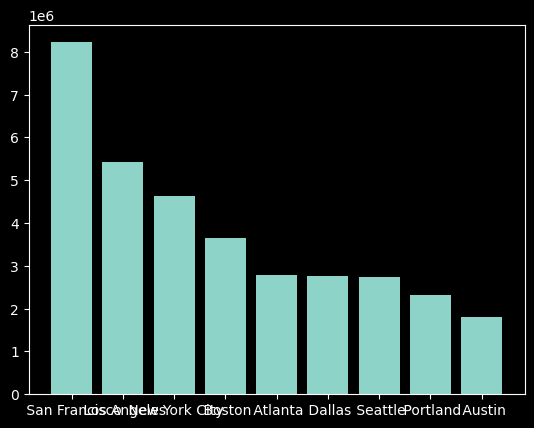

In [124]:
plt.bar(cityWithHighestSales.index, cityWithHighestSales['Sales'])

# What time should we display advertisemens to maximize the likelihood of customer’s buying a product?

In [140]:
# add hour column
cleanedData['Hour'] = cleanedData['Order Date'].str.split(' ').str[1]
cleanedData

/var/folders/z1/g3kc4r891r5dk40w3hq3k4wr0000gn/T/ipykernel_88329/3453915027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedData['Hour'] = cleanedData['Order Date'].str.split(' ').str[1]


,Order Date,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,City,Hour
0,12/30/19 00:01,Macbook Pro Laptop,1,1700,"136 Church St, New York City, NY 10001",December,1700,New York City,00:01
1,12/29/19 07:03,LG Washing Machine,1,600,"562 2nd St, New York City, NY 10001",December,600,New York City,07:03
2,12/12/19 18:21,USB-C Charging Cable,1,11,"277 Main St, New York City, NY 10001",December,11,New York City,18:21
3,12/22/19 15:13,27in FHD Monitor,1,149,"410 6th St, San Francisco, CA 94016",December,149,San Francisco,15:13
4,12/18/19 12:38,USB-C Charging Cable,1,11,"43 Hill St, Atlanta, GA 30301",December,11,Atlanta,12:38
...,...,...,...,...,...,...,...,...,...
186845,06/07/19 19:02,AAA Batteries (4-pack),1,2,"795 Pine St, Boston, MA 02215",June,2,Boston,19:02
186846,06/01/19 19:29,27in FHD Monitor,1,149,"495 North St, New York City, NY 10001",June,149,New York City,19:29
186847,06/22/19 18:57,USB-C Charging Cable,1,11,"319 Ridge St, San Francisco, CA 94016",June,11,San Francisco,18:57
186848,06/26/19 18:35,USB-C Charging Cable,1,11,"916 Main St, San Francisco, CA 94016",June,11,San Francisco,18:35


In [142]:
# group by hour
hourWithHighestSales = cleanedData.groupby('Hour').sum().sort_values('Sales', ascending=False)
hourWithHighestSales

/var/folders/z1/g3kc4r891r5dk40w3hq3k4wr0000gn/T/ipykernel_88329/2894716335.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourWithHighestSales = cleanedData.groupby('Hour').sum().sort_values('Sales', ascending=False)


,Quantity Ordered,Price Each,Sales
Hour,,,
19:01,269,54182,54298
12:21,270,53542,53980
19:16,239,53738,53978
20:13,269,52666,52945
19:20,281,52530,52708
...,...,...,...
03:57,11,302,308
04:05,5,273,273
03:59,10,165,168


In [152]:
# get element by index
hourWithHighestSales.iloc[0]


level_0        0
index          0
Hour       19:01
Name: 0, dtype: object

<BarContainer object of 1441 artists>

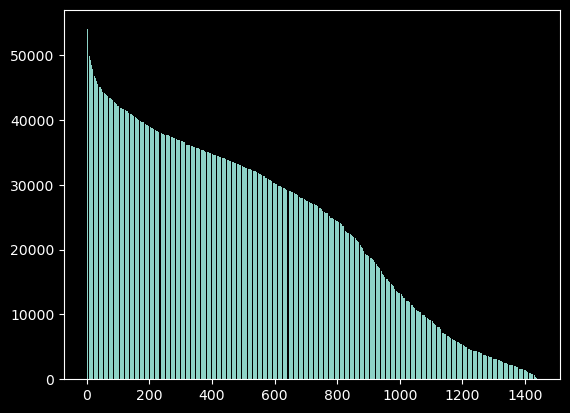

In [147]:
# plot hour with highest sales
plt.bar(hourWithHighestSales.index, hourWithHighestSales['Sales'])

# What products are most often sold together?

In [176]:
new_data = data[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']]

In [177]:
# What products are most often sold together?
# get all orders with same order id
new_data.groupby('Order ID',as_index=False, sort=False).sum()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
178433,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
178434,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
178435,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
178436,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [178]:
# if order id is duplicated, get product
get_duplicated = new_data[new_data.duplicated(subset=['Order ID'], keep=False)]
get_duplicated

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
16,295681,Google Phone,1,600,12/25/19 12:37,"79 Elm St, Boston, MA 02215"
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215"
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215"
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215"
36,295698,Vareebadd Phone,1,400,12/13/19 14:32,"175 1st St, New York City, NY 10001"
...,...,...,...,...,...,...
186820,222882,AA Batteries (4-pack),1,3.84,06/18/19 11:37,"990 Walnut St, Los Angeles, CA 90001"
186822,222884,Google Phone,1,600,06/04/19 12:06,"819 Pine St, New York City, NY 10001"
186823,222884,USB-C Charging Cable,1,11.95,06/04/19 12:06,"819 Pine St, New York City, NY 10001"
186842,222903,iPhone,1,700,06/07/19 22:21,"685 Hickory St, New York City, NY 10001"


In [181]:
#  what products are most often sold together?
get_duplicated['Grouped'] = get_duplicated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
get_duplicated

/var/folders/z1/g3kc4r891r5dk40w3hq3k4wr0000gn/T/ipykernel_88329/2454583647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  get_duplicated['Grouped'] = get_duplicated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Grouped
16,295681,Google Phone,1,600,12/25/19 12:37,"79 Elm St, Boston, MA 02215","Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215","Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215","Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215","Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400,12/13/19 14:32,"175 1st St, New York City, NY 10001","Vareebadd Phone,USB-C Charging Cable"
...,...,...,...,...,...,...,...
186820,222882,AA Batteries (4-pack),1,3.84,06/18/19 11:37,"990 Walnut St, Los Angeles, CA 90001","Apple Airpods Headphones,AA Batteries (4-pack)"
186822,222884,Google Phone,1,600,06/04/19 12:06,"819 Pine St, New York City, NY 10001","Google Phone,USB-C Charging Cable"
186823,222884,USB-C Charging Cable,1,11.95,06/04/19 12:06,"819 Pine St, New York City, NY 10001","Google Phone,USB-C Charging Cable"
186842,222903,iPhone,1,700,06/07/19 22:21,"685 Hickory St, New York City, NY 10001","iPhone,Lightning Charging Cable"


In [183]:
# drop non duplicated rows
get_duplicated = get_duplicated[['Order ID', 'Grouped']].drop_duplicates()
get_duplicated

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
186798,222863,"27in FHD Monitor,Bose SoundSport Headphones"
186804,222868,"iPhone,Apple Airpods Headphones"
186819,222882,"Apple Airpods Headphones,AA Batteries (4-pack)"
186822,222884,"Google Phone,USB-C Charging Cable"


In [187]:
# most often sold together
most_sold_together = get_duplicated.groupby('Grouped').count()
most_sold_together

,Order ID
Grouped,
"20in Monitor,20in Monitor",3
"20in Monitor,27in FHD Monitor",2
"20in Monitor,34in Ultrawide Monitor",1
"20in Monitor,AA Batteries (4-pack)",6
"20in Monitor,AAA Batteries (4-pack)",3
...,...
"iPhone,USB-C Charging Cable",12
"iPhone,Vareebadd Phone",3
"iPhone,Wired Headphones",361


In [191]:
most_sold_together.iloc[0]

Order ID    3
Name: 20in Monitor,20in Monitor, dtype: int64

# What product sold the most? Why do you think it sold the most?

In [193]:
# What product sold the most? Why do you think it sold the most?
# get product with highest sales
productWithHighestSales = cleanedData.groupby('Product').sum().sort_values('Sales', ascending=False)
productWithHighestSales

/var/folders/z1/g3kc4r891r5dk40w3hq3k4wr0000gn/T/ipykernel_88329/628136907.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  productWithHighestSales = cleanedData.groupby('Product').sum().sort_values('Sales', ascending=False)


,Quantity Ordered,Price Each,Sales
Product,,,
Macbook Pro Laptop,4728,8030800,8037600
iPhone,6849,4789400,4794300
ThinkPad Laptop,4130,4123872,4125870
Google Phone,5532,3315000,3319200
27in 4K Gaming Monitor,6244,2423470,2428916
34in Ultrawide Monitor,6199,2342599,2349421
Apple Airpods Headphones,15661,2332350,2349150
Flatscreen TV,4819,1440000,1445700
Bose SoundSport Headphones,13457,1319175,1332243


In [194]:
productWithHighestSales.iloc[0]

Quantity Ordered       4728
Price Each          8030800
Sales               8037600
Name: Macbook Pro Laptop, dtype: int64

<BarContainer object of 20 artists>

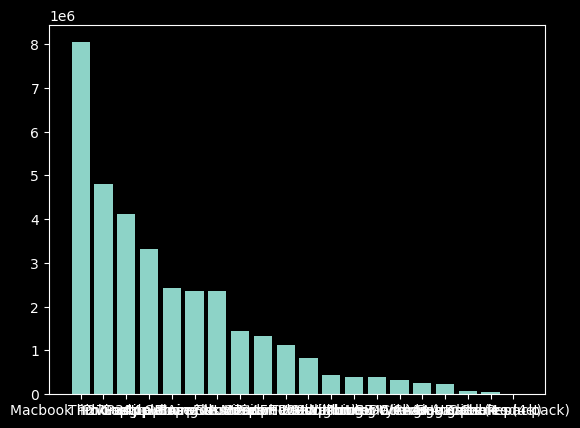

In [195]:
# plot product with highest sales
plt.bar(productWithHighestSales.index, productWithHighestSales['Sales'])

In [ ]:
# download csv
cleanedData.to_csv('cleanedData.csv')